milestone-3 fcone

In [1]:
pip install ultralytics



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from IPython.core.magic import register_line_cell_magic
import yaml
from PIL import Image
import os
import seaborn as sns
from ultralytics import YOLO
from matplotlib.patches import Rectangle
import glob
import cv2

In [6]:
warnings.filterwarnings("ignore")

np.random.seed(12345)

%matplotlib inline

!wandb disabled

W&B disabled.


In [8]:
%pip install scikit-learn


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 2.6 MB/s eta 0:00:05
   - -------------------------------------- 0.5/11.0 MB 5.1 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/11.0 MB 6.1 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.0 MB 5.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/11.0 MB 5.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/11.0 MB 5.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/11.0 MB 5.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.0 MB 3.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/11.0 MB 3.5 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/11.0 MB 3.8 MB/s eta 0:00:03
   ------- -------------------------------- 2.0/11.0 MB 3.9 MB/s eta 0:00:03
   -------- ------------------------------- 2.2/11.0 MB 3.9 MB/s eta 0:00:03
   ---


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# Regression models and metrics
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt


from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from PIL import Image
import os

In [10]:
Input_path = 'D:\safety-gear-cdl\safety_colabdl\safety_gear_detection_final\css-data'
  # Assuming css-data is the dataset folder name inside your extracted folder
Work_path = 'D:\safety-gear-cdl\safety_colabdl\safety_gear_detection_final\results_yolov8n_100e\kaggle\working'

In [11]:
num_classes = 10
classes = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

In [12]:
class_idx = {str(i): classes[i] for i in range(num_classes)}

In [13]:
dict_file = {
    'train': os.path.join(Input_path, 'train'),
    'val': os.path.join(Input_path, 'valid'),
    'test': os.path.join(Input_path, 'test'),
    'nc': num_classes,  # Number of classes
    'names': classes    # Class names
}

In [19]:
import os
import yaml  

Work_path = r'D:\safety-gear-cdl\safety_colabdl\safety_gear_detection_final\results_yolov8n_100e'  # Use raw string or double backslashes
os.makedirs(Work_path, exist_ok=True)  


file_path = os.path.join(Work_path, 'data.yaml')
# Open file and save the updated data to YAML
with open(file_path, 'w') as file:
    yaml.dump(dict_file, file)




In [ ]:
class_stat = {}
data_len = {}

# Checking for the presence of new classes in the annotations
for mode in ['train', 'valid', 'test']:
    class_count = {classes[i]: 0 for i in range(num_classes)}  # Update class count with new classes
    path = os.path.join(Input_path, mode, 'labels')  # Updated path for each mode

    for file in os.listdir(path):
        with open(os.path.join(path, file)) as f:
            lines = f.readlines()
            for cls in set([line.split()[0] for line in lines]):  # Class ID is the first character of each line
                class_count[class_idx[cls]] += 1

    data_len[mode] = len(os.listdir(path))
    class_stat[mode] = class_count


In [21]:
for mode in ['train', 'valid', 'test']:
    print(f'\nImage sizes in {mode} set:\n')
    img_size = 0
    for file in glob.glob(os.path.join(Input_path, mode, 'images', '*')):
        image = Image.open(file)
        if image.size != img_size:
            print(f'\t{image.size}')
            img_size = image.size


Image sizes in train set:

	(640, 640)

Image sizes in valid set:

	(640, 640)

Image sizes in test set:

	(640, 640)


In [22]:
# Print the number of images in each dataset
for mode in ['train', 'valid', 'test']:
    files = glob.glob(os.path.join(Input_path, mode, 'images', '*'))
    print(f'{mode} set size: {len(files)}\n')

train set size: 2605

valid set size: 114

test set size: 82



In [27]:
model = YOLO(r'D:\safety-gear-cdl\safety_colabdl\safety_gear_detection_final\results_yolov8n_100e\kaggle\working\runs\detect\train\weights\best.pt')

In [30]:
import os

# Check the prediction directory
prediction_path = r'D:\safety-gear-cdl\safety_colabdl\safety_gear_detection_final\results_yolov8n_100e\kaggle\working\runs\detect'
print("Files in prediction directory:", os.listdir(prediction_path))


Files in prediction directory: ['train']


In [31]:
import os

prediction_dir = r'D:\safety-gear-cdl\safety_colabdl\safety_gear_detection_final\results_yolov8n_100e\kaggle\working\runs\detect'
for root, dirs, files in os.walk(prediction_dir):
    print(f"\nDirectory: {root}")
    for filename in files:
        print(f"File: {filename}")



Directory: D:\safety-gear-cdl\safety_colabdl\safety_gear_detection_final\results_yolov8n_100e\kaggle\working\runs\detect

Directory: D:\safety-gear-cdl\safety_colabdl\safety_gear_detection_final\results_yolov8n_100e\kaggle\working\runs\detect\train
File: args.yaml
File: confusion_matrix.png
File: events.out.tfevents.1677085660.9bc09aceb93c.97.0
File: F1_curve.png
File: labels.jpg
File: labels_correlogram.jpg
File: PR_curve.png
File: P_curve.png
File: results.csv
File: results.png
File: R_curve.png
File: train_batch0.jpg
File: train_batch1.jpg
File: train_batch14670.jpg
File: train_batch14671.jpg
File: train_batch14672.jpg
File: train_batch2.jpg
File: val_batch0_labels.jpg
File: val_batch0_pred.jpg
File: val_batch1_labels.jpg
File: val_batch1_pred.jpg
File: val_batch2_labels.jpg
File: val_batch2_pred.jpg

Directory: D:\safety-gear-cdl\safety_colabdl\safety_gear_detection_final\results_yolov8n_100e\kaggle\working\runs\detect\train\weights
File: best.pt
File: last.pt


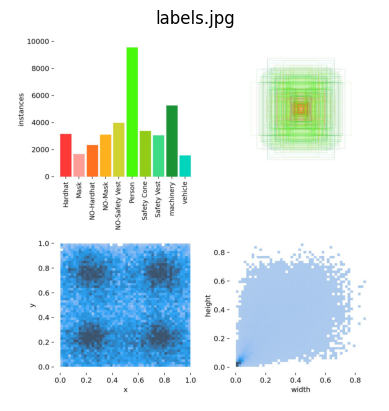

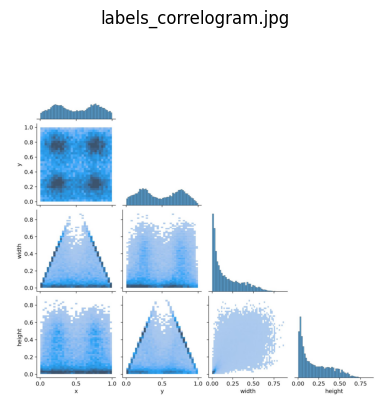

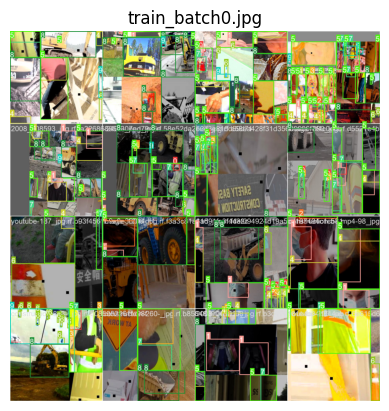

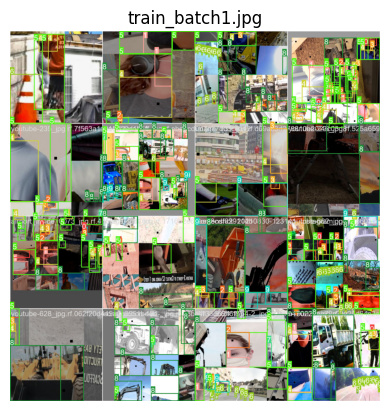

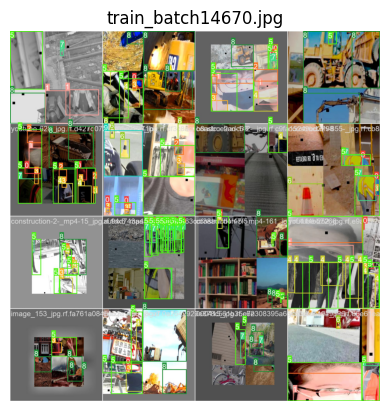

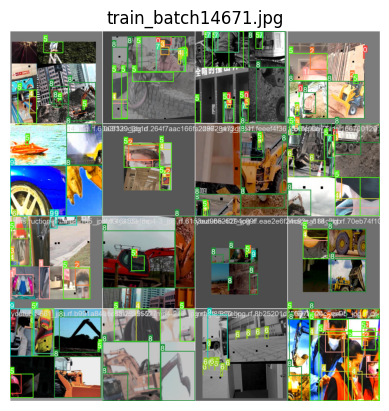

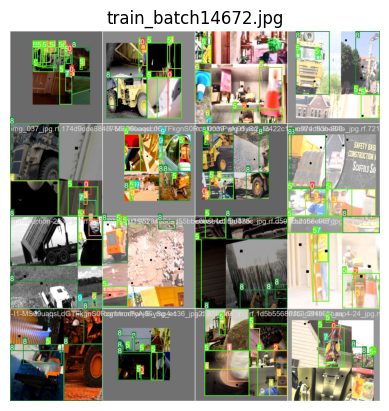

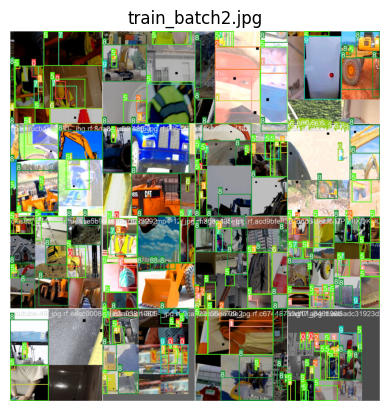

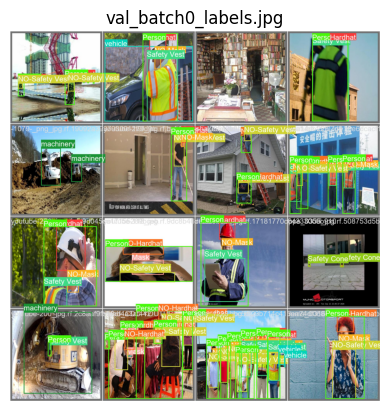

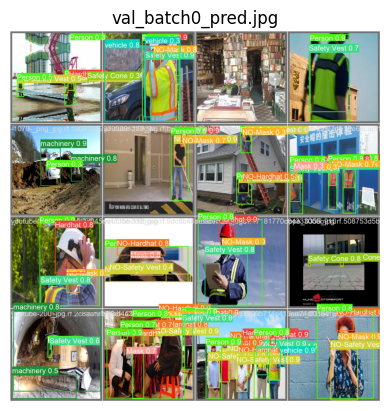

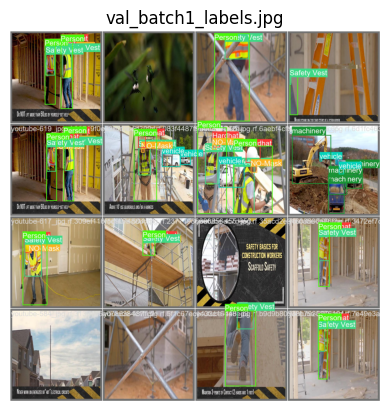

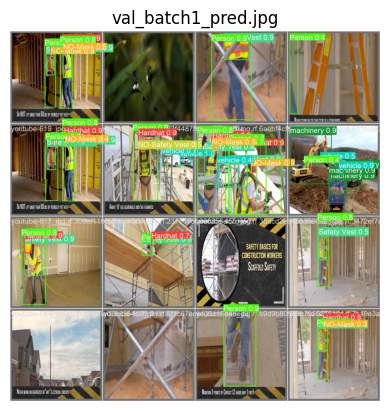

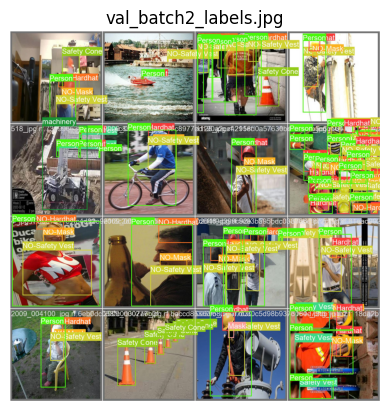

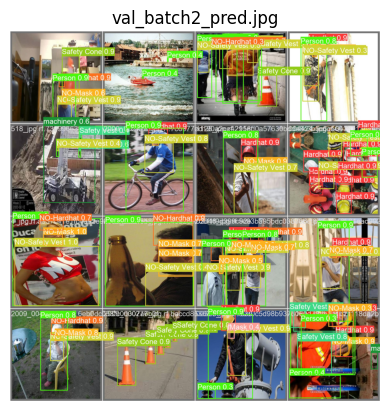

In [32]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define the path to the validation images with predictions
prediction_images_path = r'D:\safety-gear-cdl\safety_colabdl\safety_gear_detection_final\results_yolov8n_100e\kaggle\working\runs\detect\train'

# List the images (you can filter for specific batch images if needed)
images = [f for f in os.listdir(prediction_images_path) if f.endswith('.jpg')]

# Display the images
for img_name in images:
    img_path = os.path.join(prediction_images_path, img_name)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis('off')
    plt.show()


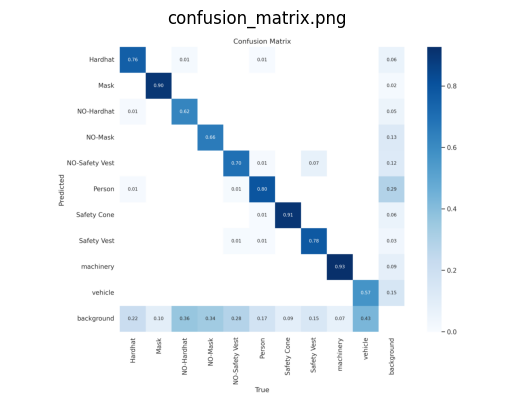

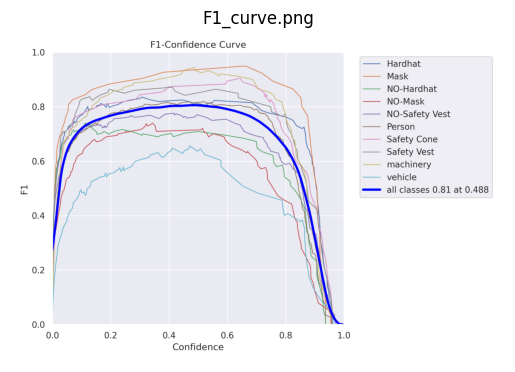

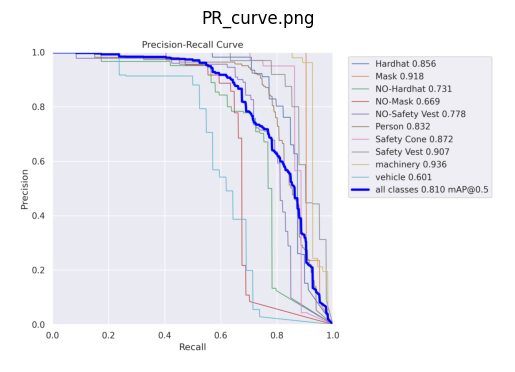

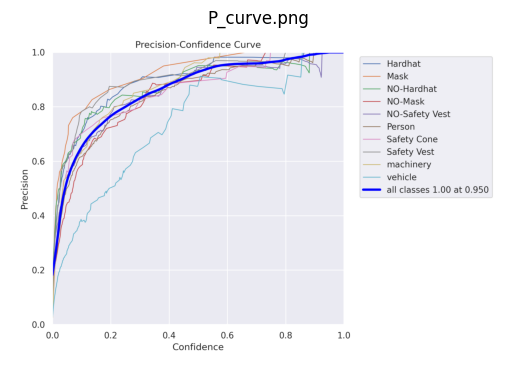

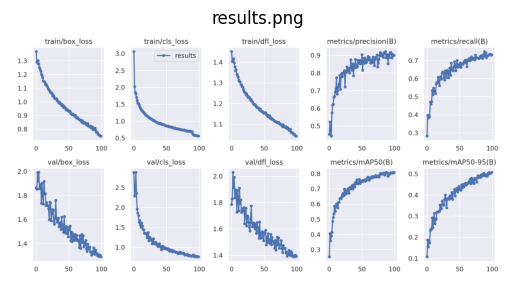

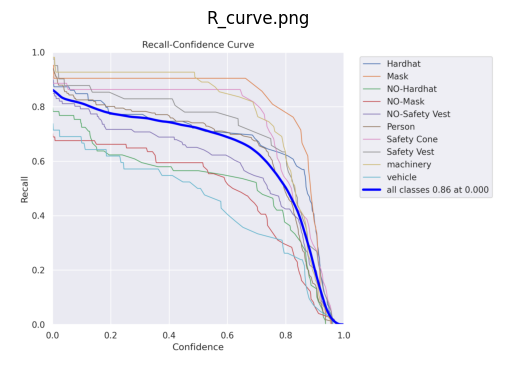

In [33]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define the path to the PNG files
png_files_path = r'D:\safety-gear-cdl\safety_colabdl\safety_gear_detection_final\results_yolov8n_100e\kaggle\working\runs\detect\train'

# List the PNG files
png_files = [f for f in os.listdir(png_files_path) if f.endswith('.png')]

# Display the PNG images
for png_name in png_files:
    png_path = os.path.join(png_files_path, png_name)
    img = Image.open(png_path)
    plt.imshow(img)
    plt.title(png_name)
    plt.axis('off')
    plt.show()
